<a href="https://colab.research.google.com/github/aounallahsara/ML_models/blob/main/random_forest%26decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
titanic=data.copy()
titanic=titanic.drop(['PassengerId','Ticket', 'Cabin', 'Name'],axis=1)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)
titanic.isna().sum()

/tmp/ipython-input-3469419118.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
/tmp/ipython-input-3469419118.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1}).astype(int)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,S
1,1,1,1,38.000000,1,0,71.2833,C
2,1,3,1,26.000000,0,0,7.9250,S
3,1,1,1,35.000000,1,0,53.1000,S
4,0,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,S
887,1,1,1,19.000000,0,0,30.0000,S
888,0,3,1,29.699118,1,2,23.4500,S
889,1,1,0,26.000000,0,0,30.0000,C


In [ ]:
titanic_encoded = pd.get_dummies(titanic, columns=['Embarked'], drop_first=False).astype(int)
titanic_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22,1,0,7,0,0,1
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,1
4,0,3,0,35,0,0,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,0,1
887,1,1,1,19,0,0,30,0,0,1
888,0,3,1,29,1,2,23,0,0,1
889,1,1,0,26,0,0,30,1,0,0


In [ ]:
y=titanic_encoded['Survived']
x=titanic_encoded.drop('Survived',axis=1)

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22,1,0,7,0,0,1
1,1,1,38,1,0,71,1,0,0
2,3,1,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,1
4,3,0,35,0,0,8,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,27,0,0,13,0,0,1
887,1,1,19,0,0,30,0,0,1
888,3,1,29,1,2,23,0,0,1
889,1,0,26,0,0,30,1,0,0


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
titanic_encoded['Age']=scaler.fit_transform(titanic_encoded[['Age']])
titanic_encoded['Fare']=scaler.fit_transform(titanic_encoded[['Fare']])
titanic_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,-0.580044,1,0,-0.498948,0,0,1
1,1,1,1,0.650112,1,0,0.789405,1,0,0
2,1,3,1,-0.272505,0,0,-0.498948,0,0,1
3,1,1,1,0.419458,1,0,0.427056,0,0,1
4,0,3,0,0.419458,0,0,-0.478817,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,-0.195620,0,0,-0.378164,0,0,1
887,1,1,1,-0.810699,0,0,-0.035946,0,0,1
888,0,3,1,-0.041851,1,2,-0.176859,0,0,1
889,1,1,0,-0.272505,0,0,-0.035946,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=5,random_state=42,criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_predict=model.predict(x_test)


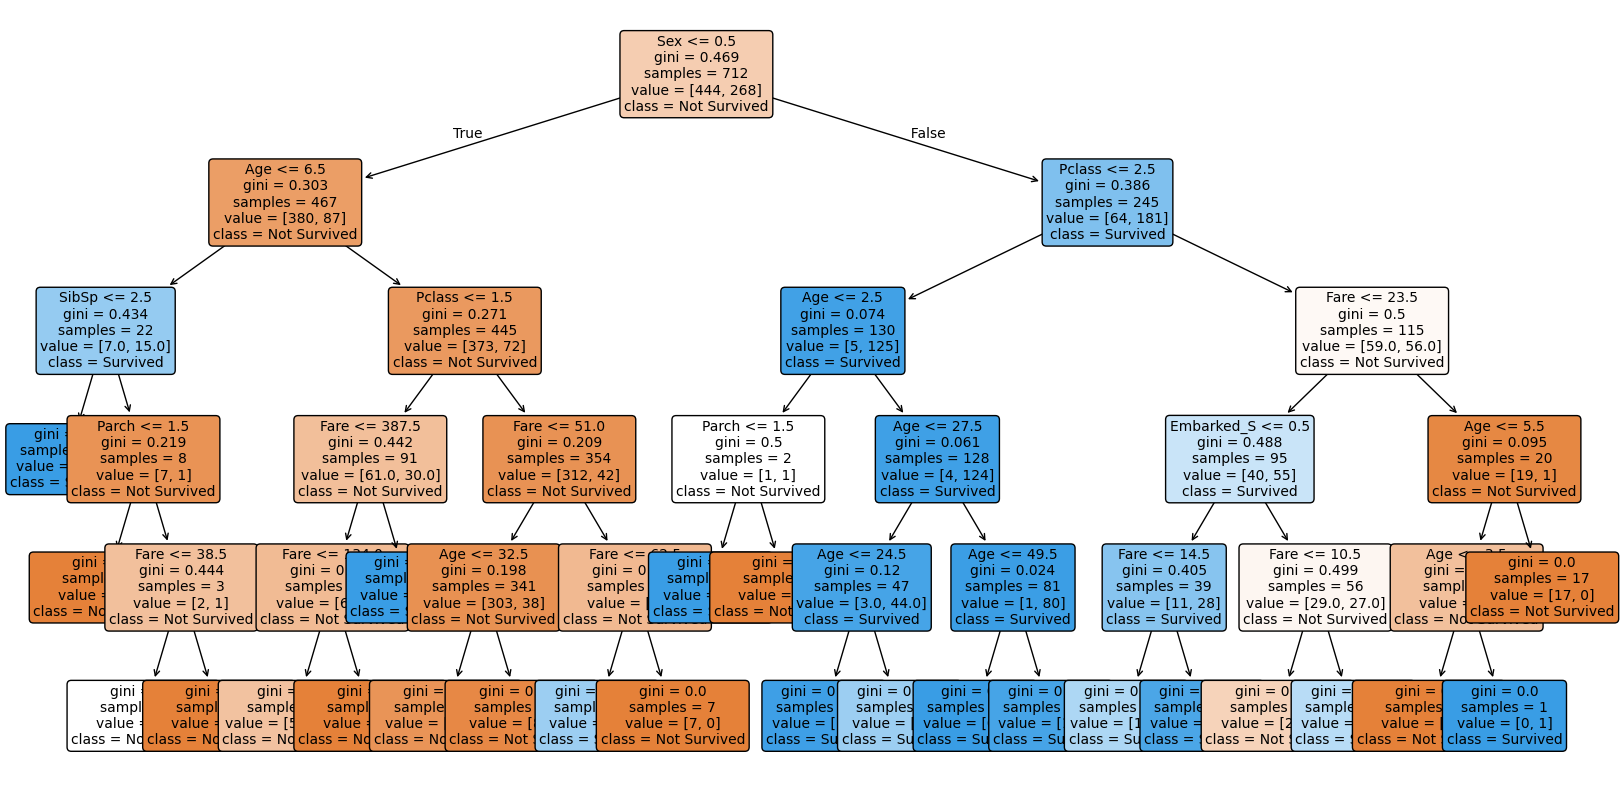

In [ ]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=x_train.columns,
    class_names=["Not Survived", "Survived"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score
print("Accuracy :", accuracy_score(y_test, y_predict))
print("precision_score :", precision_score(y_test, y_predict))
print("recall_score :", recall_score(y_test, y_predict))
print("f1_score :", f1_score(y_test, y_predict))



Accuracy : 0.8044692737430168
precision_score : 0.819672131147541
recall_score : 0.6756756756756757
f1_score : 0.7407407407407407


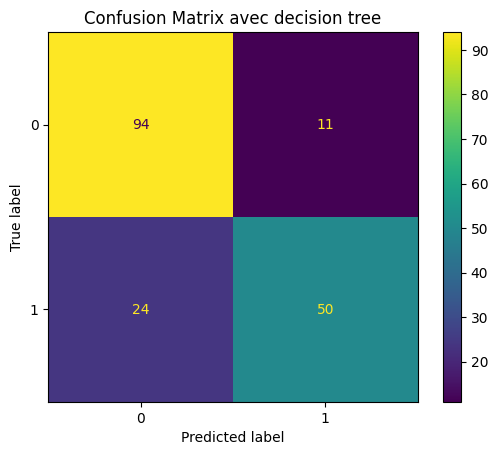

In [ ]:

cm =confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix avec decision tree")
plt.show()



## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=150,criterion='entropy',max_depth=5,random_state=42)
model2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=150,
                       random_state=42)

In [ ]:
y_predict2=model2.predict(x_test)

In [ ]:

print("Accuracy :", accuracy_score(y_test, y_predict2))
print("precision_score :", precision_score(y_test, y_predict2))
print("recall_score :", recall_score(y_test, y_predict2))
print("f1_score :", f1_score(y_test, y_predict2))


Accuracy : 0.8212290502793296
precision_score : 0.85
recall_score : 0.6891891891891891
f1_score : 0.7611940298507462


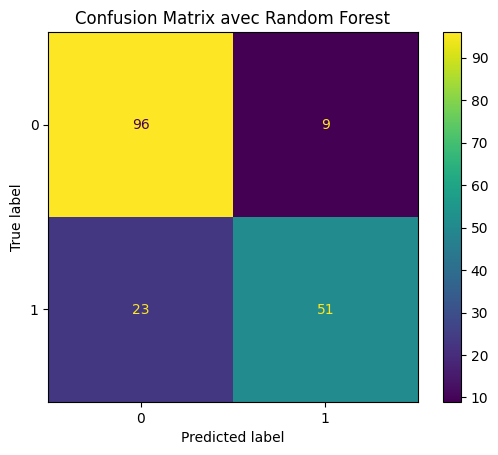

In [ ]:
cm =confusion_matrix(y_test, y_predict2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("Confusion Matrix avec Random Forest")
plt.show()

**Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
model3=GradientBoostingClassifier(max_depth=5,random_state=42,n_estimators=150)
model4=AdaBoostClassifier(n_estimators=150,random_state=42)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=150, random_state=42)

In [ ]:
y_predict3=model3.predict(x_test)
y_predict4=model4.predict(x_test)

In [ ]:

print("Accuracy avec gradient boosting:", accuracy_score(y_test, y_predict3))
print("precision_score avec gradient boosting:", precision_score(y_test, y_predict3))
print("recall_score avec gradient boosting:", recall_score(y_test, y_predict3))
print("f1_score avec gradient boosting:", f1_score(y_test, y_predict3))

Accuracy avec gradient boosting: 0.8156424581005587
precision_score avec gradient boosting: 0.7733333333333333
recall_score avec gradient boosting: 0.7837837837837838
f1_score avec gradient boosting: 0.7785234899328859


In [ ]:
print("Accuracy avec AdaBoost:", accuracy_score(y_test, y_predict4))
print("precision_score avec AdaBoost:", precision_score(y_test, y_predict4))
print("recall_score avec AdaBoost:", recall_score(y_test, y_predict4))
print("f1_score avec AdaBoost:", f1_score(y_test, y_predict4))

Accuracy avec AdaBoost: 0.8100558659217877
precision_score avec AdaBoost: 0.7941176470588235
recall_score avec AdaBoost: 0.7297297297297297
f1_score avec AdaBoost: 0.7605633802816901


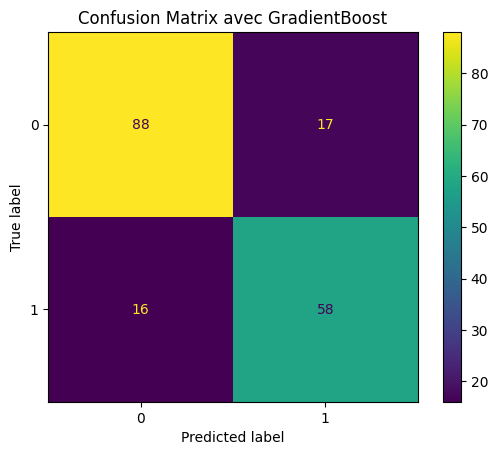

In [ ]:
cm =confusion_matrix(y_test, y_predict3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix avec GradientBoost")
plt.show()

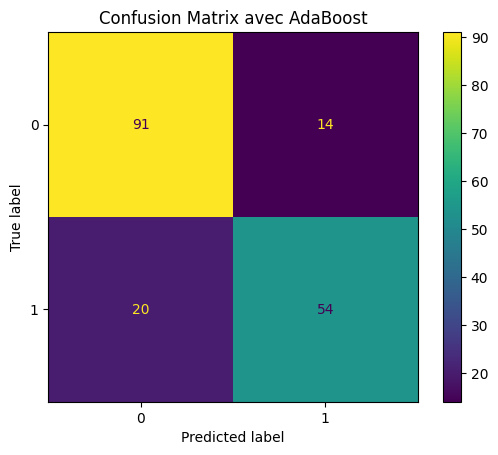

In [ ]:
cm =confusion_matrix(y_test, y_predict4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix avec AdaBoost")
plt.show()

In [ ]:
# comparative table
results = pd.DataFrame({
    'Model': ['model1', 'model2', 'model3','model4'],
    'Accuracy': [
        accuracy_score(y_test, y_predict),
        accuracy_score(y_test, y_predict2),
        accuracy_score(y_test, y_predict3),
        accuracy_score(y_test, y_predict4)

    ],
    'Precision': [
        precision_score(y_test, y_predict),
        precision_score(y_test, y_predict2),
        precision_score(y_test, y_predict3),
        precision_score(y_test, y_predict4)

    ],
    'Recall': [
        recall_score(y_test, y_predict),
        recall_score(y_test, y_predict2),
        recall_score(y_test, y_predict3),
        recall_score(y_test, y_predict4)
    ],
    'F1 Score': [
        f1_score(y_test, y_predict),
        f1_score(y_test, y_predict2),
        f1_score(y_test, y_predict3),
        f1_score(y_test, y_predict4)
    ]
})
results

,Model,Accuracy,Precision,Recall,F1 Score
0,model1,0.804469,0.819672,0.675676,0.740741
1,model2,0.821229,0.850000,0.689189,0.761194
2,model3,0.815642,0.773333,0.783784,0.778523
3,model4,0.810056,0.794118,0.729730,0.760563


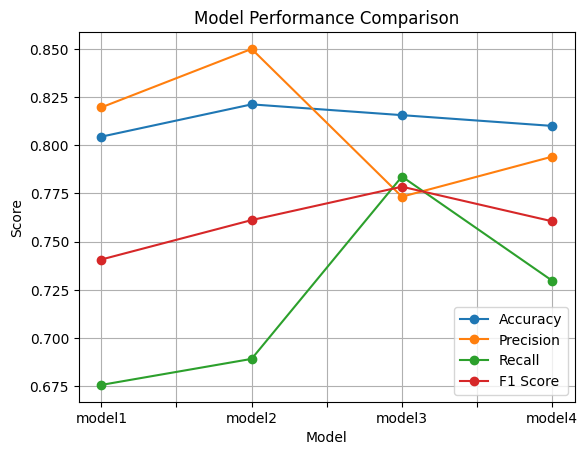

In [ ]:
results.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1 Score'], kind='line', marker='o')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.grid(True)
plt.show()